# Online Shoppers Purchasing Intention Analysis

Dataset Link -> https://drive.google.com/file/d/1QHS4CfUuDuxJql3RPD3TSCg8_WPsTh1V/view?usp=sharing

Report Link -> https://docs.google.com/document/d/1URFfGZhqxD8vChwJUH8Mfrz5atPs-Jl_qATwbWxwLss/edit?usp=sharing

### Importing Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [55]:
data=pd.read_csv("online_shoppers_intention.csv")

In [56]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [58]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [59]:
data.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


We do not need to handle null values .

### Visualizing Data

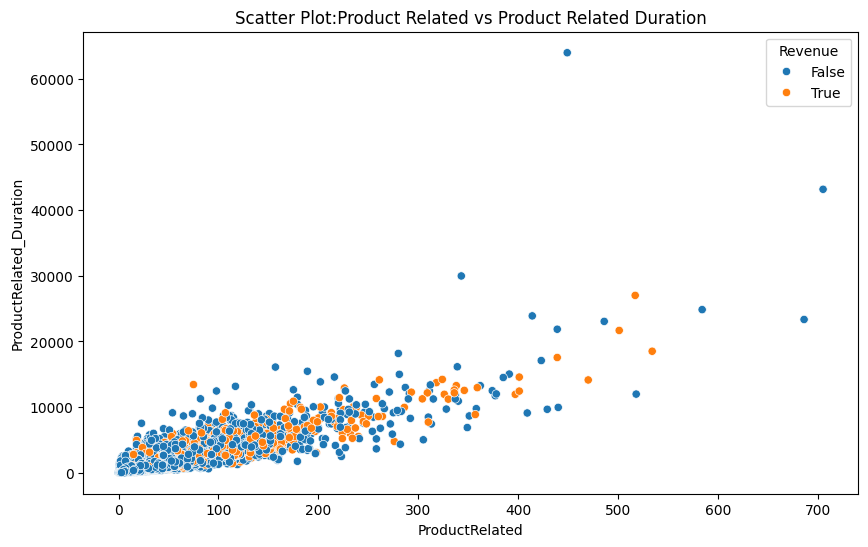

In [60]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='ProductRelated',y='ProductRelated_Duration',hue='Revenue',data=data)
plt.title('Scatter Plot:Product Related vs Product Related Duration')
plt.show()

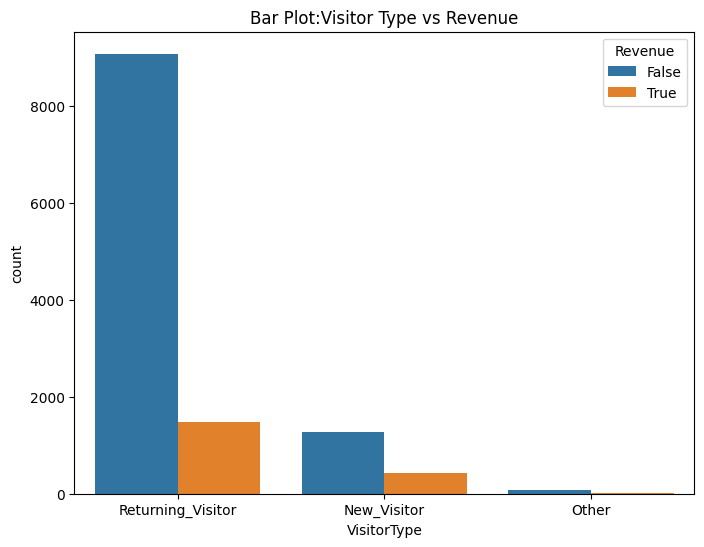

In [61]:
plt.figure(figsize=(8,6))
sns.countplot(x='VisitorType',hue='Revenue',data=data)
plt.title('Bar Plot:Visitor Type vs Revenue')
plt.show()

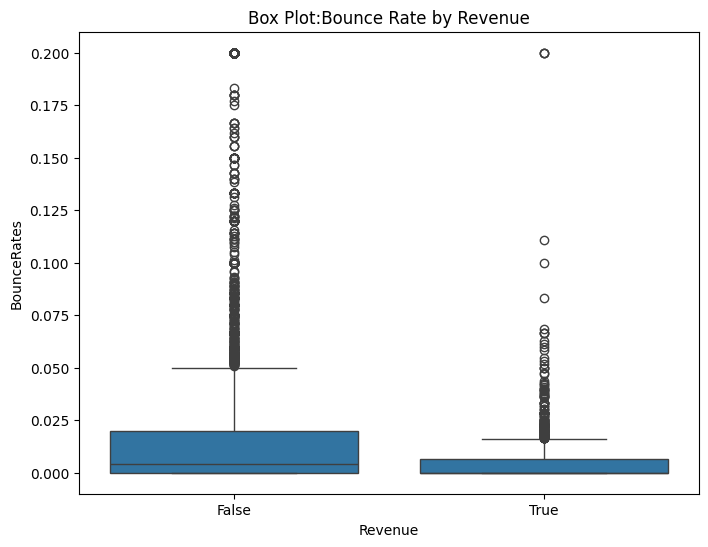

In [62]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Revenue',y='BounceRates',data=data)
plt.title('Box Plot:Bounce Rate by Revenue')
plt.show()

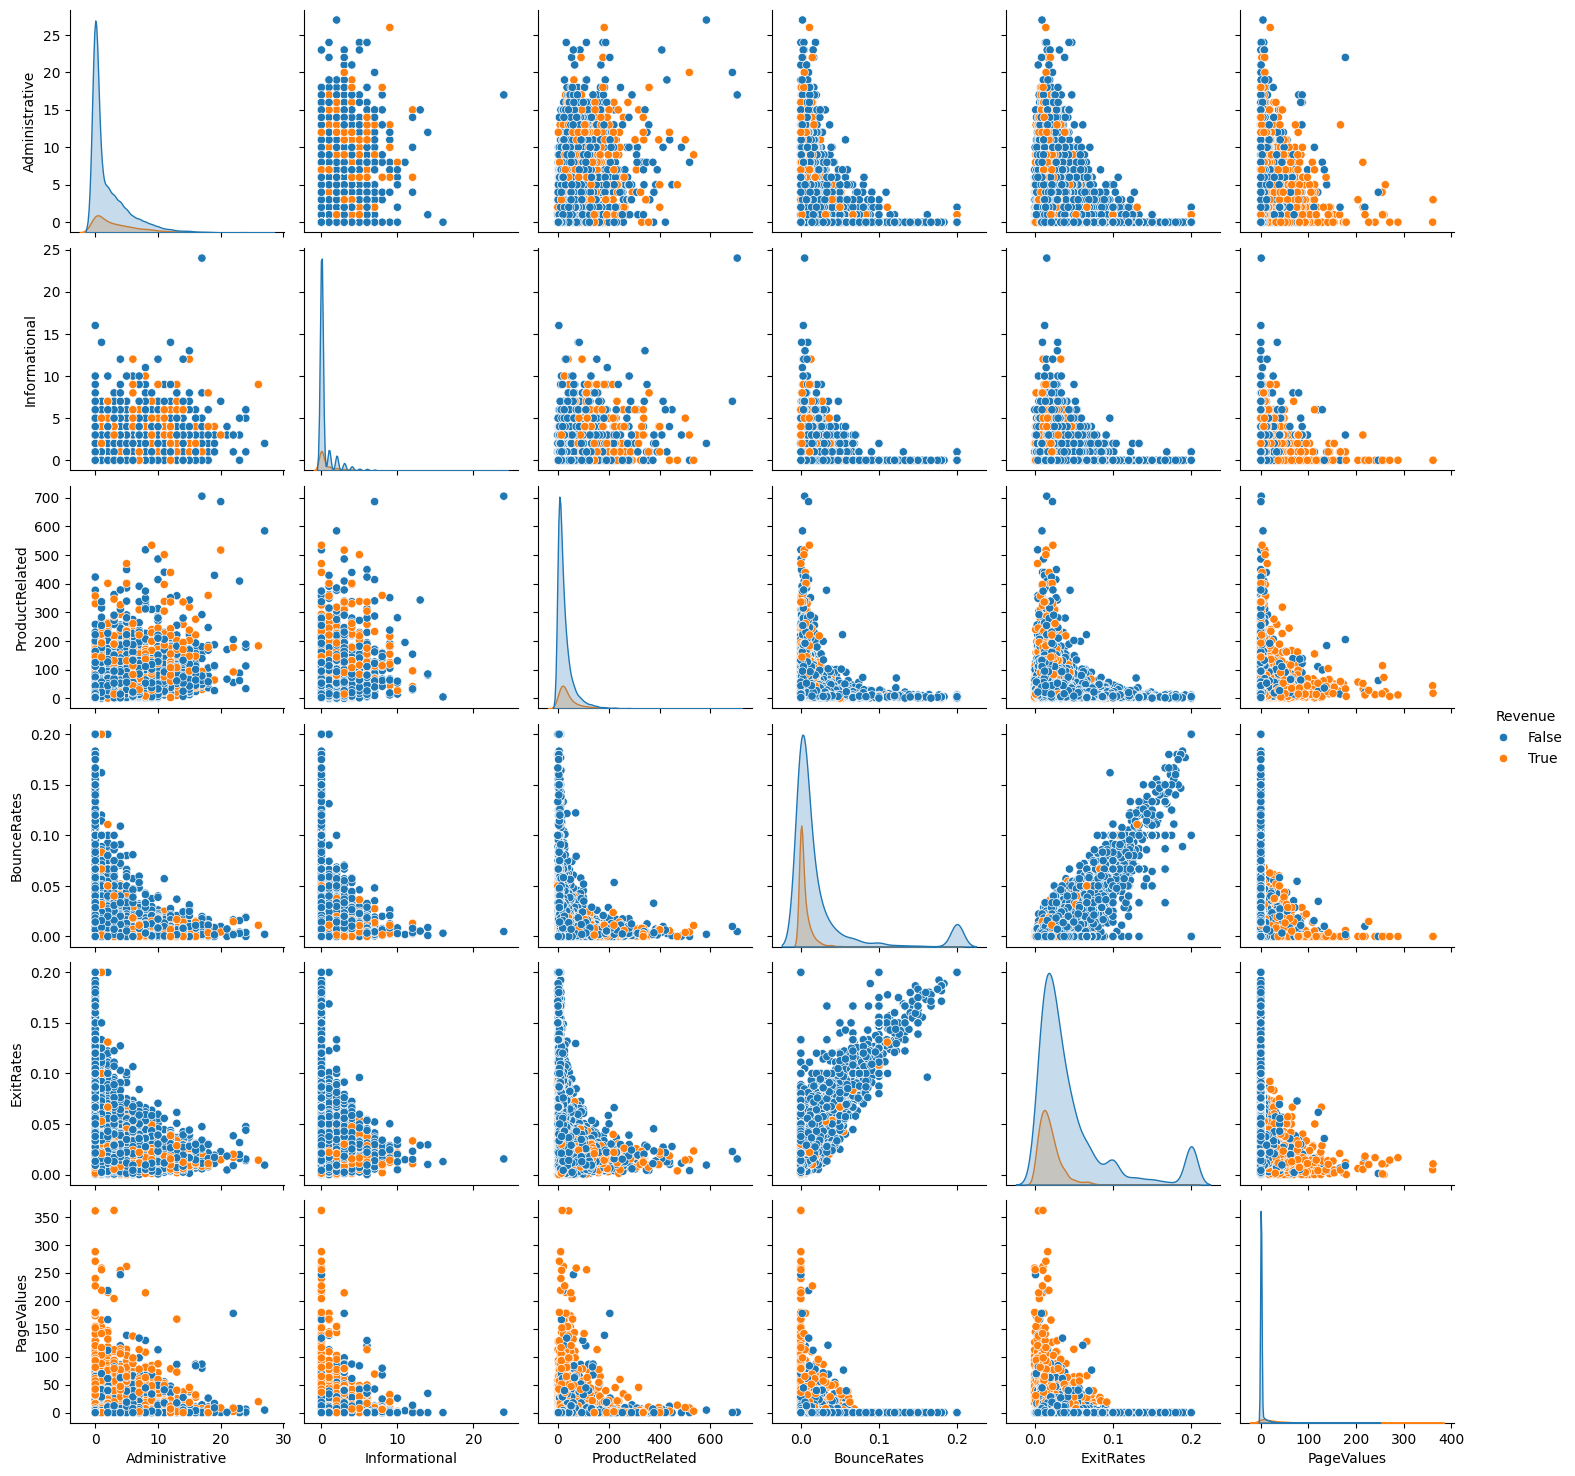

In [63]:
numerical_features=['Administrative','Informational','ProductRelated','BounceRates','ExitRates','PageValues']
sns.pairplot(data[numerical_features+['Revenue']],hue='Revenue',diag_kind='kde')
plt.show()

### Data Preprocessing

In [64]:
# Encoding categorical variables
categorical_cols=['Month','VisitorType','Weekend']
label_encoders={}
for col in categorical_cols:
    le=LabelEncoder()
    data[col]=le.fit_transform(data[col])
    label_encoders[col]=le

In [65]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,0,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,0,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,0,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,0,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,1,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,1,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,1,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,0,False


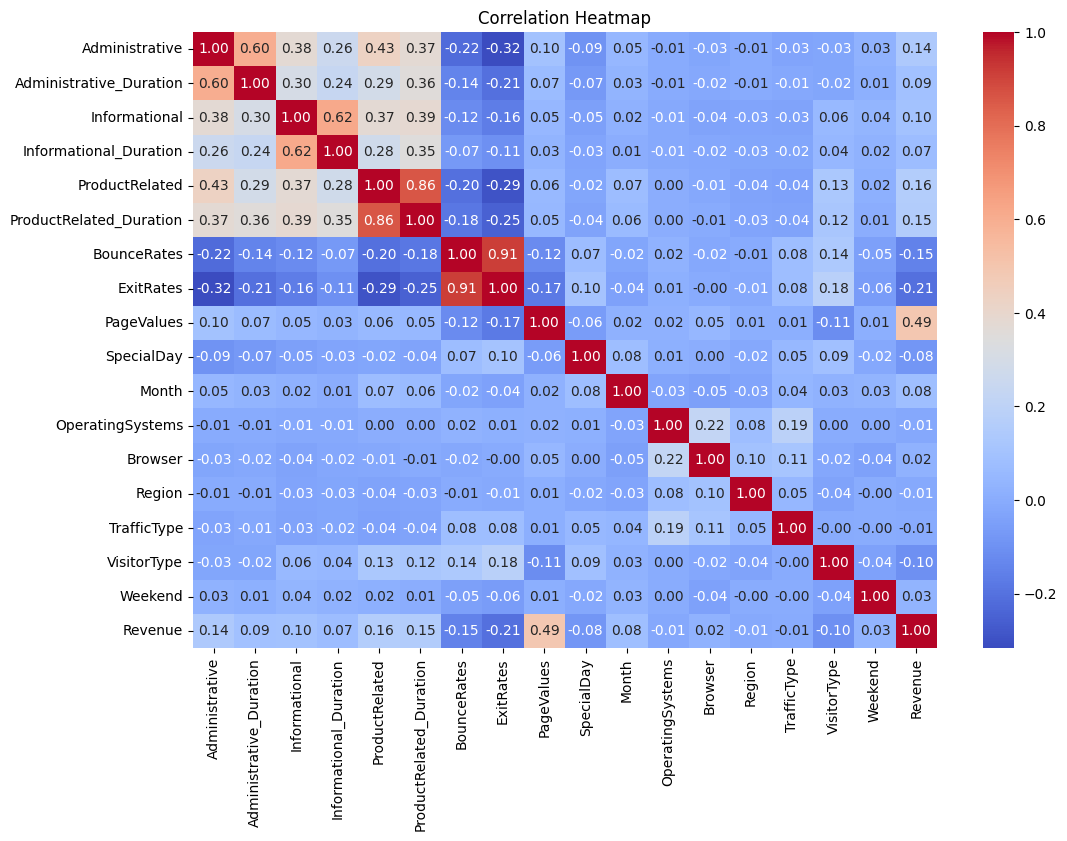

In [66]:
plt.figure(figsize=(12,8))
correlation_matrix=data.corr()
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [67]:
# Separating features and target
X=data.drop('Revenue',axis=1)
y=data['Revenue']

In [68]:
# Standardize numerical features
scaler=StandardScaler()
X_scaled=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

Scaling features to have a mean of 0 and a standard deviation of 1

In [69]:
X_scaled

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.334959,-1.233426,-0.790293,-0.894178,-0.762629,0.407786,-0.550552
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-1.334959,-0.136078,-0.207952,-0.894178,-0.514182,0.407786,-0.550552
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.334959,2.058618,-0.790293,2.437081,-0.265735,0.407786,-0.550552
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,-1.334959,0.961270,-0.207952,-0.477771,-0.017289,0.407786,-0.550552
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,-1.334959,0.961270,0.374389,-0.894178,-0.017289,0.407786,1.816360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,-0.310366,-0.288966,0.342125,-0.308821,-1.756881,2.058618,2.121412,-0.894178,-0.762629,0.407786,1.816360
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,-0.457683,-0.447364,-0.317178,-0.308821,0.774654,0.961270,-0.207952,-0.894178,0.976499,0.407786,1.816360
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,1.261014,0.897093,-0.317178,-0.308821,0.774654,0.961270,-0.207952,-0.894178,2.218733,0.407786,1.816360
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,-0.457683,-0.453140,-0.317178,-0.308821,0.774654,-0.136078,-0.207952,-0.061364,1.721839,0.407786,-0.550552


### Original dataset (with Class Imbalance)

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42,stratify=y)

In [71]:
models={
    'KNN':KNeighborsClassifier(),
    'Logistic Regression':LogisticRegression(),
    'Random Forest':RandomForestClassifier(),
    'Gradient Boosting':GradientBoostingClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'SVM':SVC(probability=True),
    'Naive Bayes':GaussianNB(),
    'XGBoost':XGBClassifier(use_label_encoder=False,eval_metric='logloss'),
}

In [72]:
results_no_smote={}
for name,model in models.items():
    print(f"Training {name}")
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_prob=model.predict_proba(X_test)[:,1] if hasattr(model,'predict_proba') else model.decision_function(X_test)

    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test,y_pred))
    results_no_smote[name]={
        'accuracy':model.score(X_test,y_test),
        'roc_auc':roc_auc_score(y_test,y_prob)
    }

Training KNN

KNN Classification Report:

              precision    recall  f1-score   support

       False       0.89      0.96      0.92      2084
        True       0.62      0.37      0.47       382

    accuracy                           0.87      2466
   macro avg       0.76      0.67      0.70      2466
weighted avg       0.85      0.87      0.85      2466

Training Logistic Regression

Logistic Regression Classification Report:

              precision    recall  f1-score   support

       False       0.89      0.98      0.93      2084
        True       0.76      0.36      0.49       382

    accuracy                           0.88      2466
   macro avg       0.83      0.67      0.71      2466
weighted avg       0.87      0.88      0.86      2466

Training Random Forest

Random Forest Classification Report:

              precision    recall  f1-score   support

       False       0.93      0.96      0.94      2084
        True       0.75      0.58      0.65       382

    

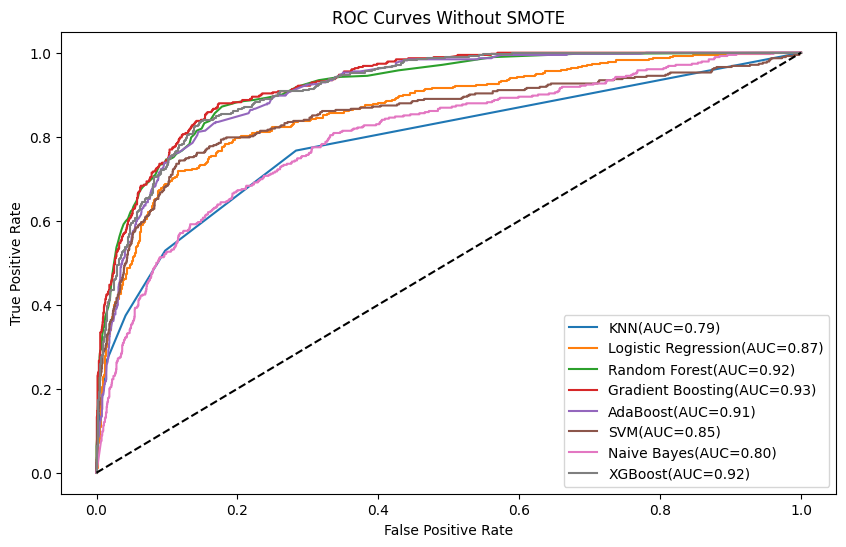

In [73]:
plt.figure(figsize=(10, 6))
for name,model in models.items():
    y_prob=model.predict_proba(X_test)[:,1] if hasattr(model,'predict_proba') else model.decision_function(X_test)
    fpr, tpr, _=roc_curve(y_test,y_prob)
    plt.plot(fpr,tpr,label=f'{name}(AUC={results_no_smote[name]["roc_auc"]:.2f})')

plt.plot([0, 1],[0, 1],'k--')
plt.title('ROC Curves Without SMOTE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [74]:
for name,result in results_no_smote.items():
    print(f"{name} without SMOTE:Accuracy={result['accuracy']:.2f}, ROC AUC={result['roc_auc']:.2f}")

KNN without SMOTE:Accuracy=0.87, ROC AUC=0.79
Logistic Regression without SMOTE:Accuracy=0.88, ROC AUC=0.87
Random Forest without SMOTE:Accuracy=0.90, ROC AUC=0.92
Gradient Boosting without SMOTE:Accuracy=0.90, ROC AUC=0.93
AdaBoost without SMOTE:Accuracy=0.89, ROC AUC=0.91
SVM without SMOTE:Accuracy=0.88, ROC AUC=0.85
Naive Bayes without SMOTE:Accuracy=0.78, ROC AUC=0.80
XGBoost without SMOTE:Accuracy=0.89, ROC AUC=0.92


### Addressing Class Imbalance using SMOTE

I could have resolved the issue of Class Imbalance using oversampling the minority class (By duplicating entries) or undersampling the majority class to balance the dataset. Rather I have used the SMOTE (Synthetic Minority Over-sampling Technique) to generate new samples for the minority class .

In [75]:
smote=SMOTE(random_state=42)
X_resampled,y_resampled=smote.fit_resample(X_scaled,y)

In [76]:
X_resampled

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.334959,-1.233426,-0.790293,-0.894178,-0.762629,0.407786,-0.550552
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-1.334959,-0.136078,-0.207952,-0.894178,-0.514182,0.407786,-0.550552
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.334959,2.058618,-0.790293,2.437081,-0.265735,0.407786,-0.550552
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,-1.334959,0.961270,-0.207952,-0.477771,-0.017289,0.407786,-0.550552
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,-1.334959,0.961270,0.374389,-0.894178,-0.017289,0.407786,1.816360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20839,0.413510,0.261378,-0.396478,-0.244931,-0.160276,-0.354311,-0.457683,-0.816048,2.618210,-0.308821,0.352731,0.205526,-0.207952,0.512196,-0.171971,-2.487697,1.816360
20840,2.439138,1.244706,0.062438,-0.220082,-0.089306,-0.134788,-0.242608,-0.440765,-0.179493,-0.308821,1.090511,-0.136078,-0.207952,0.771451,0.023890,0.407786,1.816360
20841,0.668356,1.607476,-0.185783,-0.210706,-0.050967,0.151320,-0.388693,-0.601286,1.094650,-0.308821,0.352731,-0.136078,-0.207952,0.466477,-0.381211,0.407786,-0.550552
20842,0.808283,0.374190,-0.396478,-0.244931,-0.035954,-0.289337,-0.457683,-0.823694,2.539006,-0.308821,1.473201,-0.855531,-0.589751,-0.750780,-0.351293,-2.487697,1.816360


In [77]:
y_resampled

,Revenue
0,False
1,False
2,False
3,False
4,False
...,...
20839,True
20840,True
20841,True
20842,True


### Train-Test Split

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42,stratify=y_resampled)

### Train and Evaluate Models

In [79]:
models={
    'KNN':KNeighborsClassifier(),
    'Logistic Regression':LogisticRegression(),
    'Random Forest':RandomForestClassifier(),
    'Gradient Boosting':GradientBoostingClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'SVM':SVC(probability=True),
    'Naive Bayes':GaussianNB(),
    'XGBoost':XGBClassifier(use_label_encoder=False,eval_metric='logloss'),
}

results={}
for name,model in models.items():
    print(f"Training {name}")
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_prob=model.predict_proba(X_test)[:,1] if hasattr(model,'predict_proba') else model.decision_function(X_test)

    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test,y_pred))
    results[name]={
        'accuracy':model.score(X_test,y_test),
        'roc_auc':roc_auc_score(y_test,y_prob)
    }

Training KNN

KNN Classification Report:

              precision    recall  f1-score   support

       False       0.97      0.80      0.87      2085
        True       0.83      0.97      0.89      2084

    accuracy                           0.89      4169
   macro avg       0.90      0.89      0.88      4169
weighted avg       0.90      0.89      0.88      4169

Training Logistic Regression

Logistic Regression Classification Report:

              precision    recall  f1-score   support

       False       0.80      0.90      0.85      2085
        True       0.89      0.77      0.83      2084

    accuracy                           0.84      4169
   macro avg       0.84      0.84      0.84      4169
weighted avg       0.84      0.84      0.84      4169

Training Random Forest

Random Forest Classification Report:

              precision    recall  f1-score   support

       False       0.95      0.92      0.94      2085
        True       0.93      0.95      0.94      2084

    

### ROC Curves

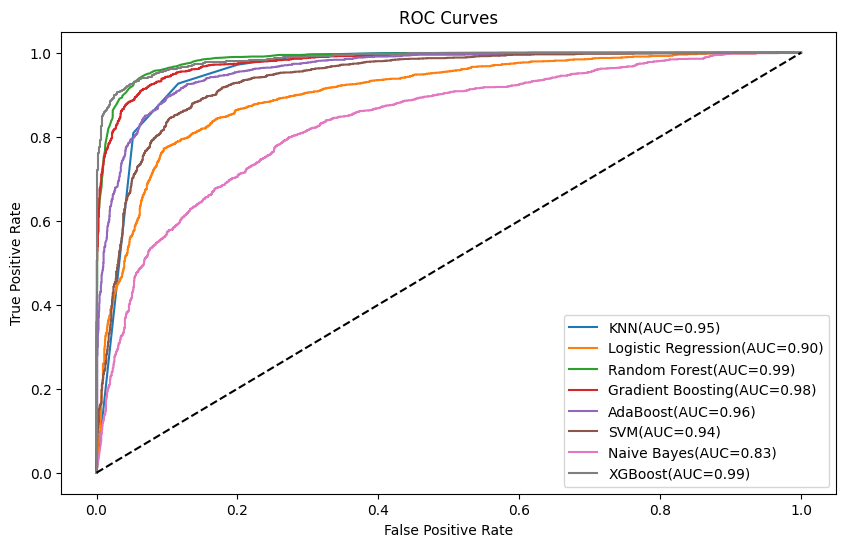

In [80]:
plt.figure(figsize=(10,6))
for name,model in models.items():
    y_prob=model.predict_proba(X_test)[:,1] if hasattr(model,'predict_proba') else model.decision_function(X_test)
    fpr,tpr,_=roc_curve(y_test,y_prob)
    plt.plot(fpr,tpr,label=f'{name}(AUC={results[name]["roc_auc"]:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Final Results Summary

In [81]:
for name,result in results.items():
    print(f"{name}: Accuracy={result['accuracy']:.2f}, ROC AUC={result['roc_auc']:.2f}")

KNN: Accuracy=0.89, ROC AUC=0.95
Logistic Regression: Accuracy=0.84, ROC AUC=0.90
Random Forest: Accuracy=0.94, ROC AUC=0.99
Gradient Boosting: Accuracy=0.92, ROC AUC=0.98
AdaBoost: Accuracy=0.90, ROC AUC=0.96
SVM: Accuracy=0.87, ROC AUC=0.94
Naive Bayes: Accuracy=0.71, ROC AUC=0.83
XGBoost: Accuracy=0.94, ROC AUC=0.99
